<a href="https://colab.research.google.com/github/CR-Reyes/Fiscomp/blob/master/MaxOneProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución del problema Max One con Algortimos Genéticos

Uno de los problemas más básicos que ilustran el potencial de los algoritmos genéticos es el problema `Max One`. En este problema, se trata de evolucionar a una población de individuos, donde cada individuo es una lista de $n$ unos o ceros, i.e. `[0, 1, 0, ..., 1, 0]`. El objetivo de la evolución es maximizar el número de unos, de manera que el individuo que maximiza la función objetivo tenga la forma: `[1, 1, 1, ..., 1, 1]`.

En primer lugar, importo las funciones que me permiten generar números aleatorios (`random`), elegir opciones de manera aleatoria (`choice`) y darle un peso diferente a cada opción (`choices`).

Después construyo una clase que define las propiedades de un individuo de la población tales como el número de genes, la lista de genes (unos y ceros), la probabilidad de reproducirse y la probabilidad de mutar. Además se definen funciones que calculan el fitness, generan una mutación y dividen la lista de genes para facilitar la reproducción.

In [3]:
from random import random, choice, choices

class Individual():
    def __init__(self, mutation_prob=0.2, individual=[], nog=10):
        self.nog = nog
        self.individual = individual
        self.reproduction_prob = 0
        self.mutation_prob = mutation_prob
    def fitness(self):
        return sum(self.individual)
    def mutate(self):
        if random() < self.mutation_prob:
            gene_index = choice(range(len(self.individual)))
            if self.individual[gene_index] == 1:
                self.individual[gene_index] = 0
            else:
                self.individual[gene_index] = 1
    def split(self, cutoff_gene):
        return (self.individual[:cutoff_gene],
                self.individual[cutoff_gene:])
    def __repr__(self):
        return str(self.individual)

Después genero una clase que reune las características de la población, tales como el número de individuos, el número de genes que tiene cada individuo y la lista de individuos. La función más importante de esta clase es `next_gen` porque lleva a cabo el cambio generacional que produce la evolución.

In [4]:
class Population():
    def __init__(self, noi=20, nog=10, population=[]):
        self.noi = noi
        self.nog = nog
        self.population = population
    def get_fittest(self): #descending
        self.population.sort(key=lambda i:i.fitness(), reverse=True)
        return self.population[0]
    def fitness(self):
        return sum([i.fitness() for i in self.population])
    def assign_reproduction_prob(self):
        population_fitness = self.fitness()
        for i in self.population:
            i.reproduction_prob = i.fitness() / (population_fitness + 0.01)
    def reproduce(self, sexual=True):
        self.assign_reproduction_prob()
        weights = [i.reproduction_prob for i in self.population]
        mom, dad = choices(self.population, weights=weights, k=2)
        if sexual:
            while mom == dad:
                mom, dad = choices(self.population, weights=weights, k=2)
        cutoff_gene = choice(range(self.nog))
        mom1, mom2 = mom.split(cutoff_gene)
        dad1, dad2 = dad.split(cutoff_gene)
        son1 = Individual(individual=(mom1 + dad2))
        son1.mutate()
        return son1
    def next_gen(self, rate_of_new=0.5): #produce next gen
        weights = [i.reproduction_prob for i in self.population]
        next_gen_list = choices(self.population, weights=weights, k=self.noi)
        for i in range(self.noi):
            son = self.reproduce()
            next_gen_list.append(son)
        next_gen = Population(self.noi, self.nog, next_gen_list)
        next_gen.assign_reproduction_prob()
        weights = [i.reproduction_prob for i in next_gen.population]
        new_population = choices(next_gen.population, weights=weights, k=self.noi)
        self.population = new_population
    def __repr__(self):
        return str(self.population)

Después genero la función que permite crear la una población de individuos con valores específicos y correr la simulación del proceso evolutivo guardando los datos de fitness e imprimiendo al individuo más apto.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def genetic_algorithm(cycles=10, noi=50, nog=50):
    # initial population
    list_of_individuals = [] 
    for _ in range(noi):
        genes = []
        for _ in range(nog):
            genes.append(choice([1, 0]))
        list_of_individuals.append(Individual(individual=genes))
    p = Population(noi, nog, list_of_individuals)

    # evolve
    fitness_vector = []
    gen_fitness_vector = []
    fittest = p.get_fittest()
    gen_fittest = fittest
    print(f"[Gen {0}] Gen fittest: {gen_fittest}, Alltime fittest:  {fittest}")
    for i in range(cycles):
        p.next_gen()
        gen_fittest = p.get_fittest()
        if gen_fittest.fitness() > fittest.fitness():
            fittest = gen_fittest
        print(f"[Gen {i+1}] Gen fittest: {gen_fittest}, Alltime fittest:  {fittest}")
        fitness_vector.append(fittest.fitness())
        gen_fitness_vector.append(gen_fittest.fitness())
        #print(f"          {p}")
    
    return fitness_vector, gen_fitness_vector

Corro la función y almaceno los datos de fitness en los vectores `v1` y `v2`.

In [24]:
v1, v2 = genetic_algorithm(1000, 20, 20)

[Gen 0] Gen fittest: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0], Alltime fittest:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0]
[Gen 1] Gen fittest: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0], Alltime fittest:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0]
[Gen 2] Gen fittest: [1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1], Alltime fittest:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0]
[Gen 3] Gen fittest: [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0], Alltime fittest:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0]
[Gen 4] Gen fittest: [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1], Alltime fittest:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0]
[Gen 5] Gen fittest: [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1], Alltime fittest:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0]
[Gen 6] Gen fittest: [1, 0, 

Finalmente, grafico los dos vectores para observar de manera más clara los resultados del proceso evolutivo.

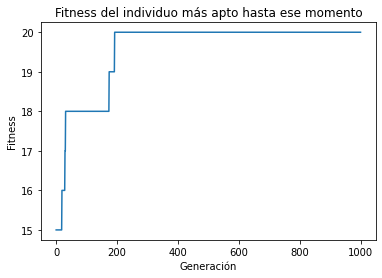

In [25]:
plt.plot(v1)
plt.title("Fitness del individuo más apto hasta ese momento")
plt.xlabel("Generación")
plt.ylabel("Fitness")
plt.show()

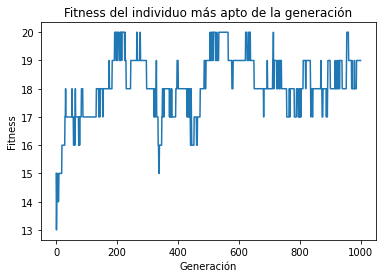

In [26]:
plt.plot(v2)
plt.title("Fitness del individuo más apto de la generación")
plt.xlabel("Generación")
plt.ylabel("Fitness")
plt.show()